In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matrixprofile as mp
import random
import time
import matrix_profile_utils

In [24]:
def select_samples_from_dataset(dataset : pd.DataFrame , samples : list):
    if (dataset.empty):
        raise ValueError("Dataset is None!")

    if (samples == None):
        raise ValueError("sample list is None")

    sampled_data = list()
    for point in samples:
        sampled_data.append(dataset.iloc[point, :])

    return pd.DataFrame(sampled_data).reset_index()

In [19]:
def concat_datasets(dataset1: pd.DataFrame, dataset2 : pd.DataFrame,*, axis = 0):
    if(dataset1 == None or dataset2 == None):
        raise ValueError("datasets can not be null")
    
    if(all(dataset1.columns == dataset2.columns)):
        return pd.concat([dataset1, dataset2], axis = axis)
    else:
        raise ValueError("dataset columns must be identical")

In [2]:
datasetSyn = pd.read_csv('../verisetleri/01-12/Syn.csv', low_memory=False)

In [59]:
datasetMonday = pd.read_csv('../verisetleri/Monday-WorkingHours.pcap_ISCX.csv')

In [246]:
datasetSyn[datasetSyn[" Label"] == "BENIGN"][" Fwd Packet Length Std"].sum()

15921.816833694655

In [247]:
datasetSyn[datasetSyn[" Label"] == "Syn"][" Fwd Packet Length Std"].sum()

5541.387661631471

In [251]:
len(datasetSyn) / 10**3

1582.681

In [3]:
matrix_profile_utils.summary_of_data(datasetSyn)

Number of packets : 1582681
Number of attacks : 1582289
Number of benign  : 392
Attack Ratio: 0.9997523190080629 
 Benign Rati0 : 0.0002476809919370604


In [115]:
newDataset = pd.DataFrame()
newDataset["year"] = pd.to_datetime(datasetSyn[" Timestamp"]).dt.year
newDataset["month"] = pd.to_datetime(datasetSyn[" Timestamp"]).dt.month
newDataset["day"] = pd.to_datetime(datasetSyn[" Timestamp"]).dt.day
newDataset["hour"] = pd.to_datetime(datasetSyn[" Timestamp"]).dt.hour
newDataset["minute"] = pd.to_datetime(datasetSyn[" Timestamp"]).dt.minute
newDataset["second"] = pd.to_datetime(datasetSyn[" Timestamp"]).dt.second
newDataset["microsecond"] = pd.to_datetime(datasetSyn[" Timestamp"]).dt.microsecond

In [129]:
newDataset["timestamp"] = newDataset["hour"].astype(str) + "-" + newDataset["minute"].astype(str) + "-" +newDataset["second"].astype(str)
    
    
    

In [252]:
newDataset

,year,month,day,hour,minute,second,microsecond,timestamp
0,2018,12,1,13,30,30,741451,13-30-30
1,2018,12,1,13,30,30,741452,13-30-30
2,2018,12,1,13,30,30,741501,13-30-30
3,2018,12,1,13,30,30,741563,13-30-30
4,2018,12,1,13,30,30,741565,13-30-30
...,...,...,...,...,...,...,...,...
1582676,2018,12,1,13,34,27,402384,13-34-27
1582677,2018,12,1,13,34,27,402386,13-34-27
1582678,2018,12,1,13,34,27,402451,13-34-27
1582679,2018,12,1,13,34,27,403142,13-34-27


In [208]:
BwdPacketLength = pd.DataFrame(datasetSyn[" Fwd Packet Length Std"])

In [209]:
Labels = pd.DataFrame(datasetSyn[" Label"])

In [168]:
label_list = list()
for i, elem in Labels.iterrows():
    if (elem[" Label"] == "Syn"):
        label_list.append(1)
    else:
        label_list.append(0)

In [169]:
labelDf = pd.DataFrame(label_list, columns=[" Label"])

In [210]:
ddddd = pd.concat([newDataset, BwdPacketLength, labelDf], axis = 1)

In [213]:
data =ddddd[["timestamp", " Fwd Packet Length Std", " Label"]]

In [214]:
mydata = data.groupby(by="timestamp").sum()

In [215]:
mydata.describe()

,Fwd Packet Length Std,Label
count,238.000000,238.000000
mean,90.181531,6648.273109
std,324.378823,1056.507744
min,0.000000,2564.000000
25%,0.000000,6056.000000
50%,0.000000,6419.500000
75%,28.438120,6678.000000
max,2840.109494,9795.000000


In [224]:
startingTime = time.time()
someFeatureForTimeseries = mydata[" Fwd Packet Length Std"]
window_size = 12

matrix_profile = mp.compute(someFeatureForTimeseries.to_list(), windows=window_size, threshold=0.95, n_jobs=4)
discords_profile = mp.discover.discords(matrix_profile, k = 10)
endingTime = time.time()

print(f"matrix profile calculation takes {endingTime - startingTime} seconds")

matrix profile calculation takes 0.009747982025146484 seconds


In [223]:
mydata.iloc[200,:]

 Fwd Packet Length Std       0.0
 Label                    6561.0
Name: 13-33-54, dtype: float64

In [227]:
mp = discords_profile["mp"]

In [225]:
discords_profile

{'mp': array([2.32513729, 2.10229187, 2.11509743, 2.21012857, 1.41040835,
        1.39685911, 2.56908923, 2.54409933, 1.38766618, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.55418813,
        0.        , 0.        , 1.22650214, 1.22372016, 1.65047122,
        1.65339571, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.73884856, 0.78860062,
        0.81322561, 0.62433516, 0.        , 0.        , 0.        ,
        0.8210586 , 0.82514899, 0.8381647 , 0.8431848 , 0.48523217,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        

/Users/batuhanduyuler/opt/anaconda3/envs/batuenv/lib/python3.7/site-packages/matrixprofile/visualize.py:375: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


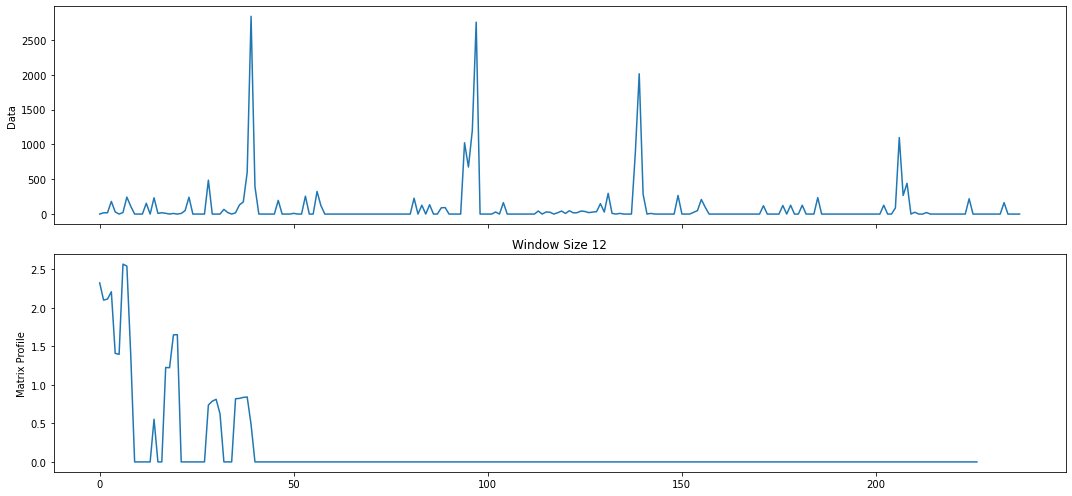

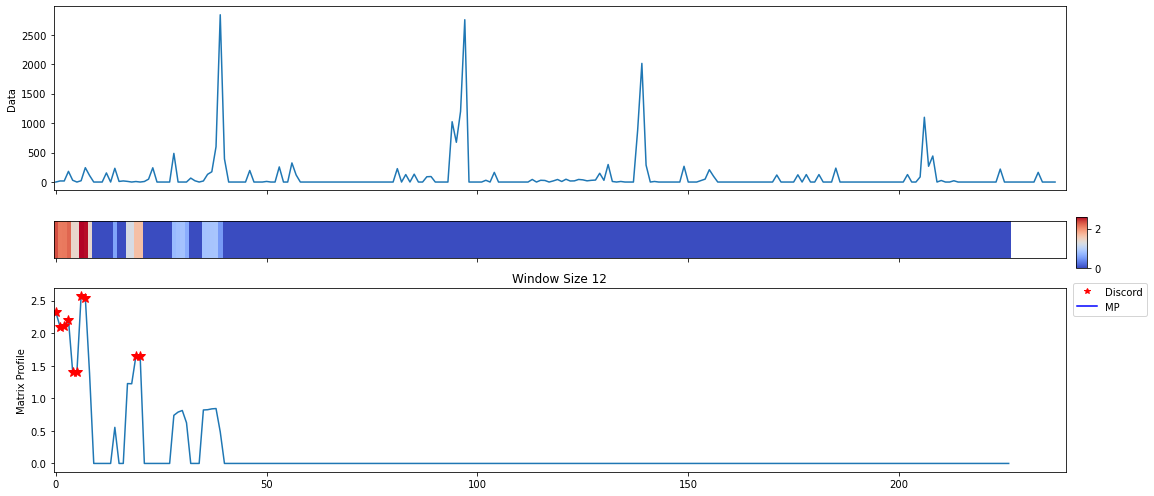

In [226]:
figures = mp.visualize(profile=discords_profile)

In [ ]:
def randomize_packets(sampleNumber : int, dataset : pd.DataFrame)->pd.DataFrame : 
    randomizePackets = [random.randint(1, len(dataset)-1) for _ in range(sampleNumber)]
    randomizedData = list()
    for point in randomizePackets:
        randomizedData.append(dataset.iloc[point, : ])

    randomizedData = pd.DataFrame(randomizedData).reset_index()
    return randomizedData

In [ ]:
def select_discords_from_dataset(dataset : pd.DataFrame, discords : list)->pd.DataFrame:
    discord_data = list()
    for point in discords:
        discord_data.append(dataset.iloc[point, :])
    
    return pd.DataFrame(discord_data)

In [ ]:
def select_slice_from_dataframe(startingIndex : int , stopIndex : int, dataframe:pd.DataFrame)->pd.DataFrame:
    return dataframe.iloc[startingIndex : stopIndex, :]

In [ ]:
def concat_datasets(dataset1 : pd.DataFrame, dataset2 : pd.DataFrame, axis = 0):
    if (all(dataset1.columns == dataset2.columns)):
        return pd.concat([dataset1, dataset2], axis=axis)
    else:
        raise ValueError("Dataframe Columns must be identical")

In [ ]:
randomizedData = randomize_packets(10000, datasetFriday)
slicedData = select_slice_from_dataframe(0, 25000, datasetFriday)

In [ ]:
randomizedData

In [ ]:
workerData = slicedData.copy()
numberOfPackets = len(workerData)
benignNumber = len(workerData[workerData[" Label"] == "BENIGN"])
ddosNumber = len(workerData[workerData[" Label"] == "DDoS"])


print(f"number of DDoS packets : {ddosNumber}")
print(f"number of Benign packets : {benignNumber}")
print(f"number of packets : {numberOfPackets}")

benignRatio = benignNumber / numberOfPackets
ddosRatio = ddosNumber / numberOfPackets

print(f"ddos Ratio : {ddosRatio} \nbenign Ratio: {benignRatio}")

In [ ]:
workerData

In [ ]:
mpDataset = concat_datasets(workerData, datasetMonday, 0)

In [ ]:
#plot ddosRatio
plt.figure(figsize=(20,10))
plt.plot(range(0, 100000), mpDataset[" Label"].to_list()[:100000])
plt.title('Mixed Working Hours')
plt.ylabel("Prediction")
plt.xlabel("Packet No")
plt.show()

In [ ]:
startingTime = time.time()
someFeatureForTimeseries = mpDataset[" Total Length of Bwd Packets"][:100000]
window_size = 2

matrix_profile = mp.compute(someFeatureForTimeseries.to_list(), windows=window_size, threshold=2, n_jobs=4)
discords_profile = mp.discover.discords(matrix_profile,exclusion_zone = 10,  k = 1)
endingTime = time.time()

print(f"matrix profile calculation takes {endingTime - startingTime} seconds")

In [ ]:
help(mp.discover.discords)

In [ ]:
figures = mp.visualize(profile=discords_profile)

In [ ]:
discords_profile

In [ ]:
examining.iloc[25093,:]

In [ ]:
examining = mpDataset[:100000]

In [ ]:
discord_data = select_discords_from_dataset(examining, list(discords_profile["discords"]))

In [ ]:
print(len(discord_data[discord_data[" Label"] == "DDoS"]) / len(discord_data))

In [ ]:
len(discord_data)

In [ ]:
len(discords_profile["mp"])

In [ ]:
matrixProfileData = discords_profile["mp"]